

# Project: Investigate a Dataset (TMDP movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset describtion**: This data set consists of an 'csv' file containing about 10.000 movies as rows entries and columns consisting of: 
>
>'id'& 'imdb_id': specific to each movie 
>
>'popularity': popularity score by the audience 
>
>'budget', 'revenue': the amount of money spend and returned from each movie
>
>'original_title': movie's title
>
>'cast': cast list of a movie 
>
>'homepage': imdp homepage of the movie 
>
>'director'
>
>'tagline', 'keywords', 'overview': simple plot giveaways
>
>'runtime': lenght of movie in minutes
>
>'genres'
>
>'production_companies' 
>
>'release_date',
>
>'vote_count', 'vote_average': the count of votes and their average 
>
>'release_year' 
>
>'budget_adj','revenue_adj': show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>
> **The Questions asked in this analysis include:**
>
>What are the highest rated 15 movies according to IMDP formula of weighted rating?
>
>*Revenues related statistical measures including:*
    >
    >Top production companies with the highest accumulated revenues?
    >
    >Top directors with the highest mean revenues?
    >
    >Top genres associated with the highest accummulative revenues?. Concluding the **attributes associated with the higher movies' revenues**.
    >
>What are the most popular genres in the last three decades and how are they shifting?
>
>What are the highest rated 15 movies recommended by IMDP analysis metrics *according to IMDP formula of weighted rating*?
>

**Firstly**: Libraries and Packages loaded

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Secondly**: Data is loaded and carrying out Data summary

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
sum(df.duplicated())

1

**Conclusion of the Data summary**
*This shows dataset consists of **10866** rows and **21** columns.* 
>Dtypes also seem pretty clean (Numerical data are stored as 'intgers or floats', and categorical data are stored as 'strings'
>
>It's also shown that some values are missing. 
>
>There's also one duplicated row that can be dropped
>
>Additionally, columns with no significance to the analysis such as: 'id', 'imdb_id', 'homepage', 'tagline', 'keywords','overview', 'release_date -*as release_year is more valuable to the analysis*-' can be dropped. 
>
>Lastly, Some values in multiple columns are separated with (|), so it's required to split them for more accurate analysis

### Data Cleaning
> **First**: Dtype of the variable 'popularity' is converted from 'float' to 'int' for more readablitiy of plots
>
>**Second**: Missing values are replaced by '0' for more consistant analysis
>
>**Third**: The duplicated row is dropped
>
>**Forth**: The columns with significance to the analysis such as: 'id', 'imdb_id', 'homepage', 'tagline', 'keywords','overview', 'release_date -as release_year is more valuable to the analysis-' are dropped.
>
>**Last**: The columns with valuable information such as 'genres', 'director' and 'production_companies' are splitted into multiple DataFrames.

In [7]:
df['popularity'] = df['popularity'].astype(int)

In [8]:
df.replace(np.nan, '0', inplace=True)
df.isnull().any()

id                      False
imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
homepage                False
director                False
tagline                 False
keywords                False
overview                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [9]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [10]:
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords','overview', 'release_date'], axis=1, inplace=True)
df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08


<a id='eda'></a>
## Exploratory Data Analysis

> **Frist**: It it useful to group the release_year into decades as it gives much clearer and more readbale plots.
>
>A new column is added groupong each 10 years into a decade


In [11]:
df['release_year'].describe()

count    10865.000000
mean      2001.321859
std         12.813260
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

*The earliest year of production is **1960** and the last year documented in this dataset is **2015**.*

*To show other percentilites more clearly, a 'pie chart' is plotted to view percentage of movies per each decade*

In [12]:
df['release_year_10'] = pd.cut(x=df['release_year'], bins=[1960, 1970, 1980, 1990, 2000, 2010, 2020])
df['decade'] = pd.cut(x=df['release_year'], bins=[1960, 1970, 1980, 1990, 2000, 2010, 2020], labels=['1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])
df.drop(['release_year_10'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,2010s
1,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,2010s
2,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,2010s
3,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,2010s
4,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,2010s


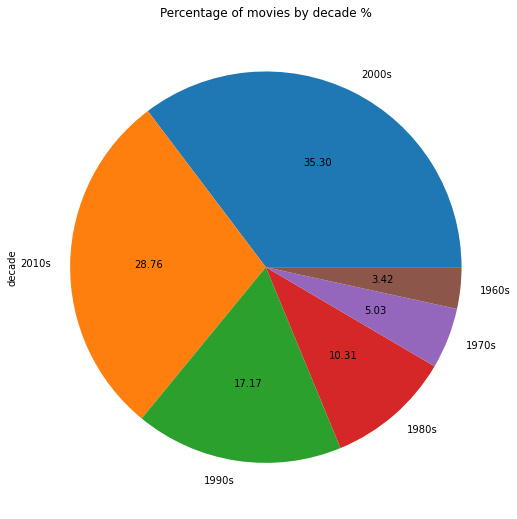

In [13]:
df['decade'].value_counts().plot(kind= 'pie',figsize=(9,9),title= 'Percentage of movies by decade %', fontsize= 10, autopct='%.2f');

In [14]:
new_genres= df.assign(genres=df['genres'].str.split('|')).explode('genres')
new_directors= df.assign(director=df['director'].str.split('|')).explode('director')
new_companies= df.assign(production_companies=df['production_companies'].str.split('|')).explode('production_companies')
new_companies.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09,2010s
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,5562,6.5,2015,1.379999e+08,1.392446e+09,2010s
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,5562,6.5,2015,1.379999e+08,1.392446e+09,2010s


### Research Question 1 (*Is there a secret formula to the Billion-Movies that companies need to know?*   )
##### What are **the common attribuites** of movies with **the highest revenue!**

First, the **highest 15 movies** in revenue are plotted

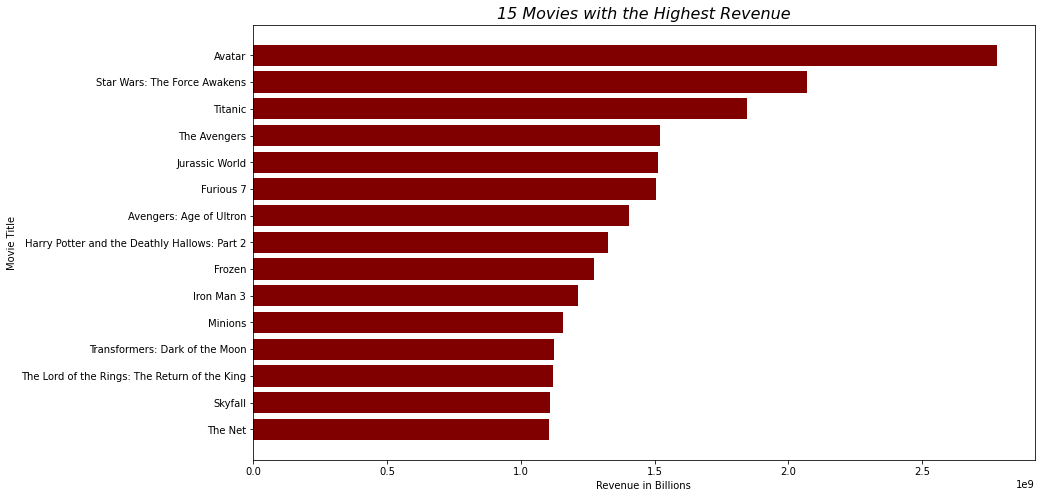

In [15]:
most_revenue = df.sort_values('revenue', ascending=False)
plt.figure(figsize=(14,8))
plt.barh(most_revenue['original_title'].head(15),most_revenue['revenue'].head(15), align='center',color='maroon')
plt.gca().invert_yaxis()
plt.xlabel("Revenue in Billions")
plt.ylabel("Movie Title")
plt.title("15 Movies with the Highest Revenue", fontsize=16, fontstyle='oblique');

Then, The **companies** _that seem to know some kind of a billion-movie formula_ are plotted

Followed by the **directors** associated to the highest cumulative revenue

**A function is created 'charting' with chart parameters (x_label, y_label,title) and styling to avoid repetitve coding!**

In [16]:
def charting(x_label, y_label, title, df2):
    df2.plot(kind= 'barh', align= 'center',color= 'maroon',figsize= (14,8));
    plt.gca().invert_yaxis()
    plt.xlabel(x_label, fontsize= 12)
    plt.ylabel(y_label, fontsize= 12)
    plt.title(title, fontsize=16);

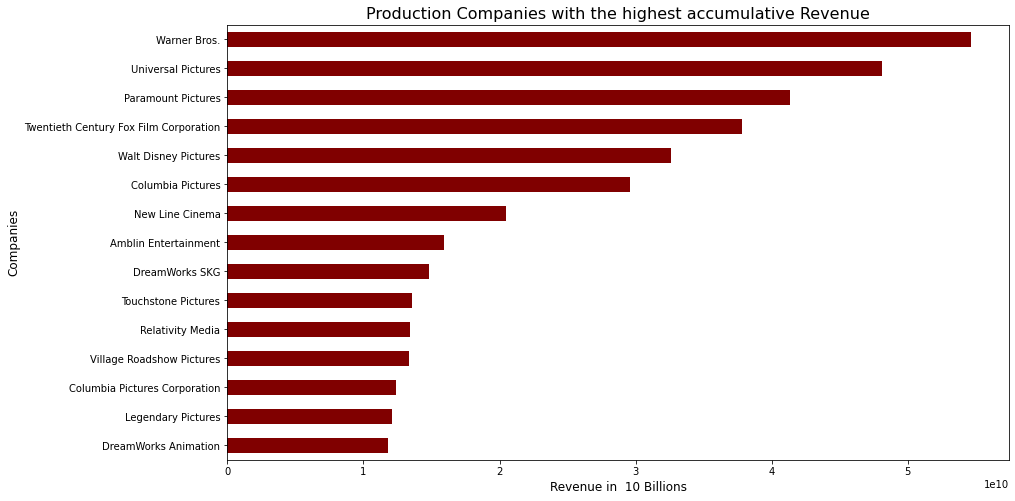

In [17]:
companies_revenues= new_companies.groupby('production_companies')['revenue'].sum()
top_companies= companies_revenues.sort_values(ascending=False).head(15)
charting("Revenue in  10 Billions", "Companies", "Production Companies with the highest accumulative Revenue", top_companies)

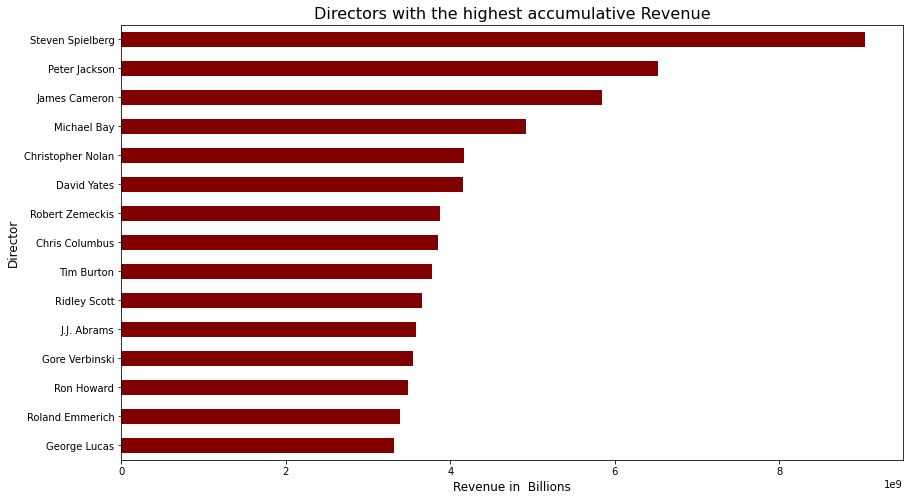

In [18]:
directors_revenues = new_directors.groupby('director')['revenue'].sum()
top_directors= directors_revenues.sort_values( ascending=False).head(15)
charting("Revenue in  Billions", "Director", "Directors with the highest accumulative Revenue", top_directors)

Now, It's Time to sort out the **genres** grossing tens -if not hundreds- of Billions

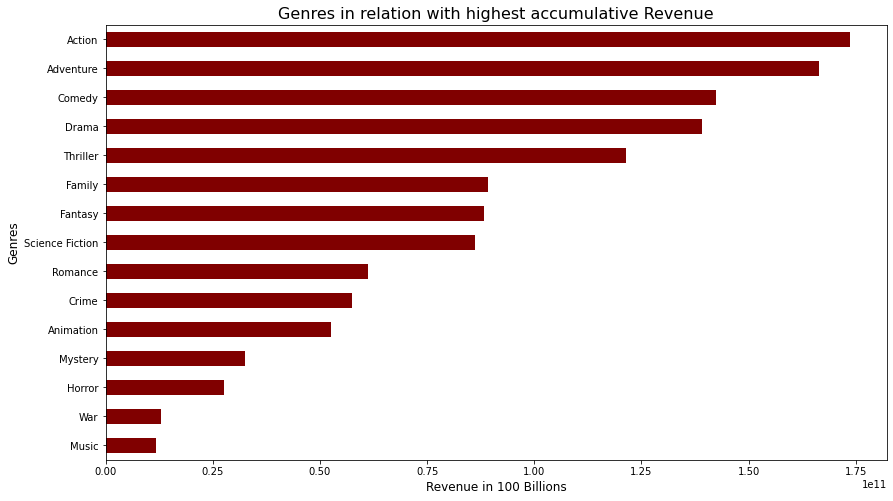

In [20]:
genres_revenues = new_genres.groupby('genres')['revenue'].sum()
top_genres= genres_revenues.sort_values( ascending=False).head(15)
charting("Revenue in 100 Billions", "Genres", "Genres in relation with highest accumulative Revenue", top_genres)

Then, some **histograms** are plotted to summarize some other variables. 

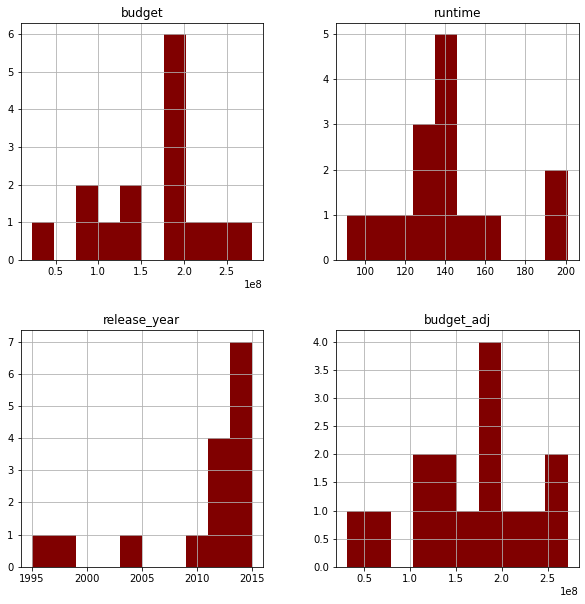

In [21]:
most_revenues_movies= df.sort_values('revenue', ascending= False).head(15)
most_revenues_movies.hist(column= ['budget', 'runtime', 'release_year', 'budget_adj'], color= 'maroon', figsize= (10,10),);

## Answer 1:
##### The common charactristics of the movies with billion-revenue seem to be:
###### 1: Genre | Action, Adventure, Comdey, Drama and Thriller have accumulative grossing revenues over 100 billion each|
###### 2: Budget | It appears that most  billion-revenue movies needs a budget around (100: 250 Milliom)|
###### 3: Run Time | It appears that movies with the highest revenues have an approximate  runtime between (100:160 Minutes)| 
###### 4: And lastly,  Production companies -first of them are- |"Warner Bros, Universal Pictures , Paramount Pictures , Twentieth Century Fox Film Corporation, Walt Disney Pictures" certainely perform the quality analysis that makes them the highest top grossing 5 production companies|

### Research Question 2  (Are movie goers of yonger generations attracted to a certain genre?)
##### What are the most popular genres in the last three decades and how are they shifting?

In [22]:
pop_movies = new_genres.groupby(['genres', 'decade'], as_index=False)['popularity'].mean().sort_values('popularity', ascending= False)
pop_movies['decade'] = pop_movies['decade'].str.replace('s','').astype('int')
pop_movies.head()

,genres,decade,popularity
17,Adventure,2010,1.546032
101,Science Fiction,2010,1.219436
125,Western,2010,1.136364
11,Action,2010,1.012259
59,Fantasy,2010,0.957447


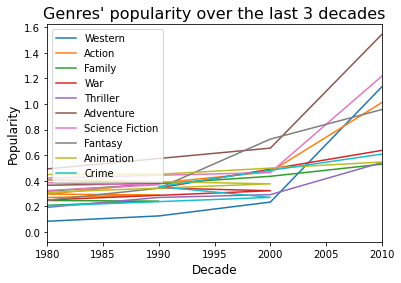

In [23]:
d = pop_movies.to_dict();

new_df = pd.DataFrame(data=d)
n = 20
pop= pop_movies['genres'].drop_duplicates()
pop = pop.head(10)

genres_set = set(pop)

plt.figure()
for genre in genres_set:
     selected_data = new_df.loc[new_df['genres'] == genre]
     plt.plot(selected_data['decade'], selected_data['popularity'], label=genre)
 
plt.rcParams["figure.figsize"] = (10 , 12)
plt.xlabel("Decade", fontsize= 12)
plt.ylabel('Popularity', fontsize= 12)
plt.title("Genres' popularity over the last 3 decades", fontsize= 16)
plt.xlim((1980,2010))
plt.legend();

## Answer 2:
##### The 10 most popular genres in the last 3 decades are:
*Adventure
*Science Fiction
*Western
*Action
*Fantasy
*War
*Crime
*Animation
*Thriller
*Family
>
>It apperas that the first five genres **(Adventure, Science Fiction, Western, Action and Fantasy)** are getting **significantly higher popularity** scores over the last 30 years.
>
>Meanwhile, genres like **(War, Crime, Animation, Thriller and Family)** are getting **slightly higher popularity** scores over the last 3 decades.
>
>It can also lead to a conclusion that the count of most popular genres is increasing due to the intensive increase in the production level of these movies in the recent years!


### Research Question 3  (Which 'must-see' movies do movie lovers think are the best?)
##### What are the highest rated 15 movies according to IMDP formula of weighted rating?

In [24]:
x=df['vote_count']
y=df['vote_average']
M=df['vote_average'].mean()
mini=df['vote_count'].quantile(0.95)

df['imdp_score']=((x*y)+ (M*mini))/(x+mini)

df.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade,imdp_score
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,2010s,6.418239
1,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,2010s,6.939934
2,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,2010s,6.204895
3,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,2010s,7.252352
4,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,2010s,6.957831


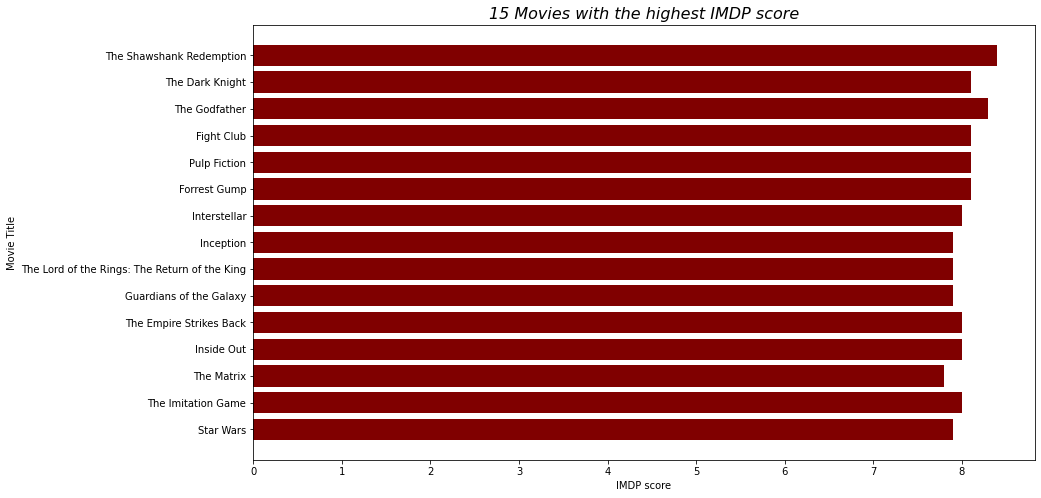

In [25]:
most_revenue = df.sort_values('imdp_score', ascending=False)
plt.figure(figsize=(14,8))
plt.barh(most_revenue['original_title'].head(15),most_revenue['vote_average'].head(15), align='center',color='maroon')
plt.gca().invert_yaxis()
plt.xlabel("IMDP score")
plt.ylabel("Movie Title")
plt.title("15 Movies with the highest IMDP score" , fontsize=16, fontstyle='oblique');

## Answer 3:
##### Movies with the highest IMDP rates are of diverse genres, production companies, cast  and budget.
>
>However, they surely have one thing in common, It is that Movie lovers and critics believe -in their own point of view- that these are the best movies ever made.

<a id='conclusions'></a>
## Conclusions

> **Analysis summary and limitations**: The Movie Database is well sorted and thourough including almost every essential element for Analysis except for a few limitations and open questions:
>
> The first issue was that many columns have values seperated with special character which made a column that have many elements such as the 'cast' column hard to investigate
>
>This dataset also lacked elements about contribution of women directors and female lead casting making which was a personal interest of mine to try and figure valuable outputs.
>
>The data set also has no evidence of the currency of the money-related variable such as 'budget' and 'revenue' which was set to be assumed to be in US dollar. 
>
>Overall, the Dataset was satisfying to work on and answered many questions about my personal interests in movies.